[*********************100%%**********************]  1 of 1 completed


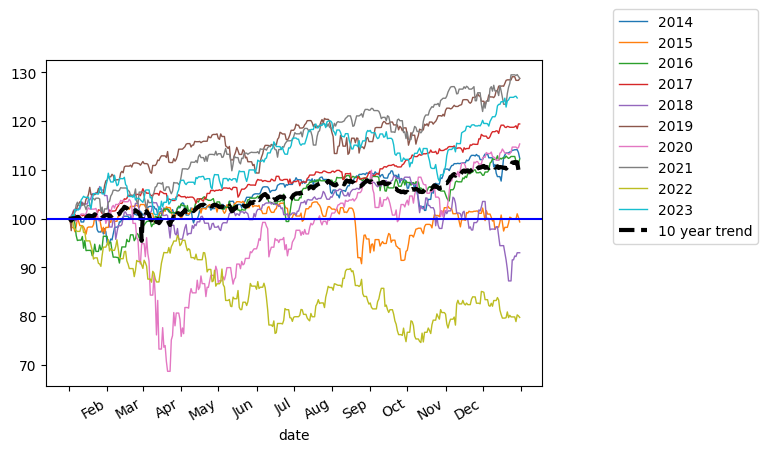

In [5]:
import pandas as pd
import yfinance as yf
import ssl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Read in the SP500 tickers
# ssl._create_default_https_context = ssl._create_unverified_context
# table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# df = table[0]
# df.to_csv('S&P500-Info.csv', index=False)
# df.to_csv("S&P500-Symbols.csv", columns=['Symbol'], index=False)


# Alternatively, read tickers from pre-existing csv
df = pd.read_csv("S&P500-Symbols.csv")
tickers = df['Symbol']


# Fetch data
#data = yf.download(tickers,'2015-1-1')['Adj Close']

# Import SP500 index
start_date = '1984-01-01'
end_date = '2023-12-31'
spx = pd.DataFrame(yf.download('^SPX', start_date, end_date)['Adj Close'])

all_dates = pd.date_range(start_date,end_date)
spx['Price Date'] = spx.index
spx = spx.reindex(all_dates,method='bfill')

# Assign year, and attach
spx['Year'] = spx.index.year
spx['Month Day'] = spx.index.strftime('%m-%d')

spx['Yr Init Price'] = spx.groupby('Year',sort=False).transform('first'
    )['Adj Close']
spx['Seasonal Trend Price'] = spx['Adj Close']/spx['Yr Init Price']*100

# Now take averages over the last 10 years
spx10yr = spx.groupby('Month Day').mean()
spx10yr['plot date'] = list(spx10yr.reset_index()['Month Day'].apply(lambda x: 
                        datetime.strptime("2000-"+x, "%Y-%m-%d")))

# Plot
fig, ax = plt.subplots()

for label, dfy in spx.assign(
    # Set to 2000 because it has Feb 29
    date=pd.to_datetime(spx.index.strftime('2000-%m-%d')),
    year=spx.index.strftime('%Y')
).groupby('year'):
    dfy.set_index('date')['Seasonal Trend Price'].plot(ax=ax, label=str(label),linewidth=1)

ax.plot(spx10yr['plot date'], spx10yr['Seasonal Trend Price'],
    label='10 year trend',linewidth=3.0,linestyle='dashed',color='black')
ax.axhline(y=100,color='blue')

locator = mdates.MonthLocator()  # every month
formatter = mdates.ConciseDateFormatter(
    locator,
    formats=['', '%b', '%d', '%H:%M', '%H:%M', '%S.%f'],
    offset_formats=['', '', '%b', '%b-%d', '%b-%d', '%b-%d %H:%M']
)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend(bbox_to_anchor=(1, 1),loc='upper left')



# We expect an average 10% return from holding the SP500, over the last 10
# years. Note from the graph that the average upward trend tends to start in
# Apr: holding from Jan-Mar is expected to have around zero returns.
# Is this something we see going even further back?

# Five-year averages
# Import SP500 index
start_date = '2004-01-01'
end_date = '2023-12-31'
spx = pd.DataFrame(yf.download('^SPX', start_date, end_date)['Adj Close'])

all_dates = pd.date_range(start_date,end_date)
spx['Price Date'] = spx.index
spx = spx.reindex(all_dates,method='bfill')
spx['Year'] = spx.index.year
spx['Month Day'] = spx.index.strftime('%m-%d')
spx['Yr Init Price'] = spx.groupby('Year',sort=False).transform('first'
    )['Adj Close']
spx['Seasonal Trend Price'] = spx['Adj Close']/spx['Yr Init Price']*100
spx['Yr Group'] = np.select(
    conditions=[df.Year<2009, df.Year<2014, df.Year<2019],
    values=['2004-2008 Trend','2009-2013 Trend','2014-2018 Trend'],
    default = ['2019-2023 Trend'])

# Plot
fig, ax = plt.subplots()

spx5yr = spx.groupby(['Month Day','Yr Group']).mean()
spx5yr['plot date'] = list(spx5yr.reset_index()['Month Day'].apply(lambda x: 
                        datetime.strptime("2000-"+x, "%Y-%m-%d")))
spx5yr=spx5yr[spx5yr['plot date']!='2000-02-29']

for label, dfy in spx5yr.groupby('Yr Group'):
    dfy.set_index('plot date')['Seasonal Trend Price'].plot(ax=ax, label=str(label))


locator = mdates.MonthLocator()  # every month
formatter = mdates.ConciseDateFormatter(
    locator,
    formats=['', '%b', '%d', '%H:%M', '%H:%M', '%S.%f'],
    offset_formats=['', '', '%b', '%b-%d', '%b-%d', '%b-%d %H:%M']
)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')

ax.axhline(y=100,color='blue')


In [24]:
spx10yr.loc['04-01']

Adj Close                       2898.663965
Price Date              2018-10-01 04:48:00
Year                                 2018.5
Yr Init Price                   2894.571008
Seasonal Trend Price             100.754507
plot date               2000-04-01 00:00:00
Name: 04-01, dtype: object

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TypeError: select() got an unexpected keyword argument 'conditions'

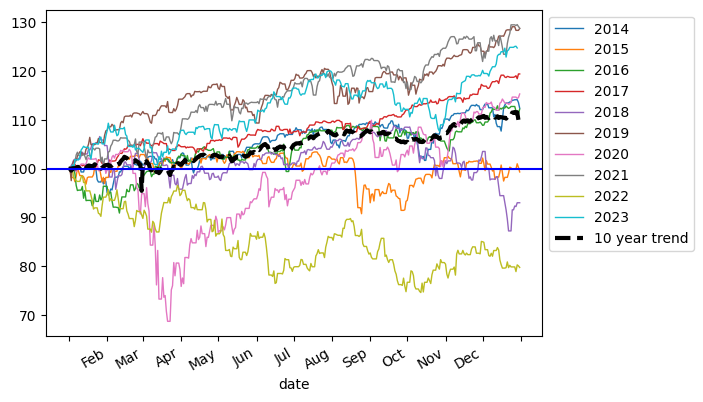

In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Five-year averages
# Import SP500 index
start_date = '1989-01-01'
end_date = '2023-12-31'
spx = pd.DataFrame(yf.download('^SPX', start_date, end_date)['Adj Close'])

all_dates = pd.date_range(start_date,end_date)
spx['Price Date'] = spx.index
spx = spx.reindex(all_dates,method='bfill')
spx['Year'] = spx.index.year
spx['Month Day'] = spx.index.strftime('%m-%d')
spx['Yr Init Price'] = spx.groupby('Year',sort=False).transform('first'
    )['Adj Close']
spx['Seasonal Trend Price'] = spx['Adj Close']/spx['Yr Init Price']*100
spx['Yr Group'] = np.select(
    condlist=[spx.Year<1994, spx.Year<1999, spx.Year<2004, spx.Year<2009, spx.Year<2014, spx.Year<2019],
    choicelist=['1989-1993 Trend','1994-1998 Trend','1999-2003 Trend','2004-2008 Trend','2009-2013 Trend','2014-2018 Trend'],
    default = ['2019-2023 Trend'])

# Plot
fig, ax = plt.subplots()

spx5yr = spx.groupby(['Month Day','Yr Group']).mean()
spx5yr['plot date'] = list(spx5yr.reset_index()['Month Day'].apply(lambda x: 
                        datetime.strptime("2000-"+x, "%Y-%m-%d")))
spx5yr=spx5yr[spx5yr['plot date']!='2000-02-29']

for label, dfy in spx5yr.groupby('Yr Group'):
    dfy.set_index('plot date')['Seasonal Trend Price'].plot(ax=ax, label=str(label))


locator = mdates.MonthLocator()  # every month
formatter = mdates.ConciseDateFormatter(
    locator,
    formats=['', '%b', '%d', '%H:%M', '%H:%M', '%S.%f'],
    offset_formats=['', '', '%b', '%b-%d', '%b-%d', '%b-%d %H:%M']
)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')

ax.axhline(y=100,color='blue')

In [43]:
(spx[spx['Month Day']=='12-31'].groupby('Yr Group')['Seasonal Trend Price'].mean()-
spx[spx['Month Day']=='04-01'].groupby('Yr Group')['Seasonal Trend Price'].mean())+

Yr Group
1989-1993 Trend     9.183037
1994-1998 Trend    17.053481
1999-2003 Trend     0.788507
2004-2008 Trend    -0.927912
2009-2013 Trend    11.085032
2014-2018 Trend     6.006889
2019-2023 Trend    12.868771
Name: Seasonal Trend Price, dtype: float64

In [40]:
spx[spx['Month Day']=='12-31'].groupby('Yr Group')['Seasonal Trend Price'].mean()-100

Yr Group
1989-1993 Trend    12.355853
1994-1998 Trend    22.183497
1999-2003 Trend    -0.839762
2004-2008 Trend    -1.479989
2009-2013 Trend    13.829925
2014-2018 Trend     7.252805
2019-2023 Trend    13.131870
Name: Seasonal Trend Price, dtype: float64